In [74]:
import pandas as pd
import os

## Read row in `test.csv` and shift the columns

In [75]:
from datetime import timedelta, datetime


def parse_time_diff(time_diff_str: str) -> timedelta:
    # get a string in the format of -HH:MM and return a timedelta object
    is_negative = time_diff_str[0] == '-'

    if time_diff_str[0] in ['+', '-']:
        time_diff_str = time_diff_str[1:]

    hours, minutes = time_diff_str.split(':')
    if is_negative:
        hours = -int(hours)
        minutes = -int(minutes)

    return timedelta(hours=int(hours), minutes=int(minutes))

In [76]:
test_data_file = os.path.join("..", "..", "data", "raw", "test.csv")
df_test = pd.read_csv(test_data_file, low_memory=False, index_col=0)
df_test_row = df_test[df_test.index == 'p24_0']
df_test_row.loc[:, 'time'] = datetime(2028, 1, 2, 16, 35, 0)
df_test_row = df_test_row.set_index('time').infer_objects()
df_test_row

/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
time,,,,,,,,,,,,,,,,,,,,,
2028-01-02 16:35:00,p24,8.7,8.2,8.3,8.8,8.9,9.5,9.8,10.2,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
columns_start_with_bg = [col for col in df_test_row.columns if col.startswith('bg')]
df_test_row = df_test_row[['p_num'] + columns_start_with_bg]

result = pd.DataFrame()

for col in columns_start_with_bg:
    time_to_shift = parse_time_diff(col[2:])
    df_temp = df_test_row[[col, 'p_num']]
    df_temp.index = df_temp.index + time_to_shift
    df_temp = df_temp.rename({col: 'bg'}, axis=1)
    
    if result.empty:
        result = df_temp
    else:
        result = pd.concat([result, df_temp], axis=0)

df_test_row_merged = result.sort_index()
df_test_row_merged

,bg,p_num
time,,
2028-01-02 10:40:00,8.7,p24
2028-01-02 10:45:00,8.2,p24
2028-01-02 10:50:00,8.3,p24
2028-01-02 10:55:00,8.8,p24
2028-01-02 11:00:00,8.9,p24
...,...,...
2028-01-02 16:15:00,6.7,p24
2028-01-02 16:20:00,6.9,p24
2028-01-02 16:25:00,7.7,p24


## Check if it' correct in `all_test_combined.csv`

In [78]:
from datetime import datetime

# Load the data
test_combined_data_file = os.path.join("..", "..", "data", "interim", "all_test_combined.csv")
df_test_combined = pd.read_csv(test_combined_data_file, low_memory=False, index_col=0, parse_dates=True)
df_test_combined.head()
df_test_combined_temp = df_test_combined[(df_test_combined.index > datetime(2028, 1, 1, 0, 0, 0)) & (df_test_combined.index < datetime(2028, 1, 3, 0, 0, 0))]
df_test_combined_temp

,p_num,time,bg,insulin,carbs,hr,steps,cals,activity
2028-01-02 10:40:00,p24,10:40:00,8.7,0.0708,NaN,79.1,0.0,4.39,NaN
2028-01-02 10:45:00,p24,10:45:00,8.2,0.0708,NaN,84.1,225.0,15.94,NaN
2028-01-02 10:50:00,p24,10:50:00,8.3,0.0708,NaN,104.3,41.0,12.11,NaN
2028-01-02 10:55:00,p24,10:55:00,8.8,0.0708,NaN,85.0,53.0,6.97,NaN
2028-01-02 11:00:00,p24,11:00:00,8.9,0.0708,NaN,92.2,145.0,13.20,NaN
...,...,...,...,...,...,...,...,...,...
2028-01-02 23:35:00,p24,23:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 23:40:00,p24,23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 23:45:00,p24,23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 23:50:00,p24,23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


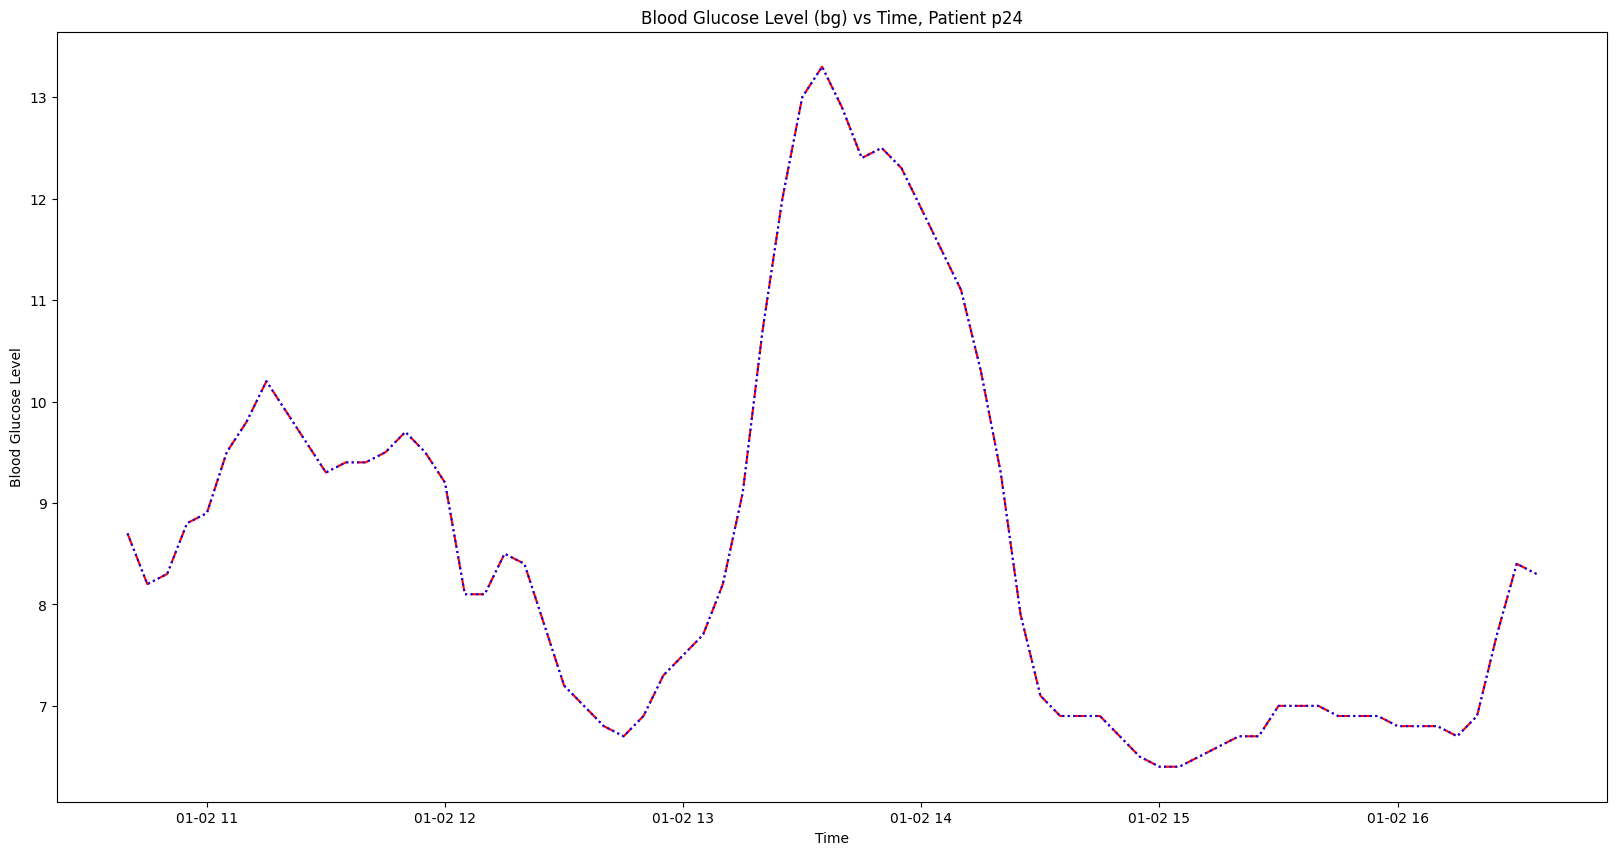

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.title(f'Blood Glucose Level (bg) vs Time, Patient {str(df_temp['p_num'].iloc[0])}')
plt.plot(df_test_combined_temp.index, df_test_combined_temp['bg'], label='bg_combined', color='red', linestyle='dashdot')
plt.plot(df_test_row_merged.index, df_test_row_merged['bg'], label='bg_test', color='blue', linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('Blood Glucose Level')
plt.show()

## Create a function to shift the columns back

In [80]:
df_test_combined = df_test_combined_temp.copy()
df_test_combined

,p_num,time,bg,insulin,carbs,hr,steps,cals,activity
2028-01-02 10:40:00,p24,10:40:00,8.7,0.0708,NaN,79.1,0.0,4.39,NaN
2028-01-02 10:45:00,p24,10:45:00,8.2,0.0708,NaN,84.1,225.0,15.94,NaN
2028-01-02 10:50:00,p24,10:50:00,8.3,0.0708,NaN,104.3,41.0,12.11,NaN
2028-01-02 10:55:00,p24,10:55:00,8.8,0.0708,NaN,85.0,53.0,6.97,NaN
2028-01-02 11:00:00,p24,11:00:00,8.9,0.0708,NaN,92.2,145.0,13.20,NaN
...,...,...,...,...,...,...,...,...,...
2028-01-02 23:35:00,p24,23:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 23:40:00,p24,23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 23:45:00,p24,23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 23:50:00,p24,23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# start with most relevant columns
df_test_combined = df_test_combined[['p_num', 'bg']]
df_test_combined

,p_num,bg
2028-01-02 10:40:00,p24,8.7
2028-01-02 10:45:00,p24,8.2
2028-01-02 10:50:00,p24,8.3
2028-01-02 10:55:00,p24,8.8
2028-01-02 11:00:00,p24,8.9
...,...,...
2028-01-02 23:35:00,p24,NaN
2028-01-02 23:40:00,p24,NaN
2028-01-02 23:45:00,p24,NaN
2028-01-02 23:50:00,p24,NaN


In [82]:
import numpy as np

df_test_lag_features = df_test_combined.copy()
df_test_lag_features['bg+1:00'] = df_test_lag_features['bg'].shift(periods=1, freq="-1h")
df_test_lag_features


,p_num,bg,bg+1:00
2028-01-02 10:40:00,p24,8.7,9.4
2028-01-02 10:45:00,p24,8.2,9.5
2028-01-02 10:50:00,p24,8.3,9.7
2028-01-02 10:55:00,p24,8.8,9.5
2028-01-02 11:00:00,p24,8.9,9.2
...,...,...,...
2028-01-02 23:35:00,p24,NaN,NaN
2028-01-02 23:40:00,p24,NaN,NaN
2028-01-02 23:45:00,p24,NaN,NaN
2028-01-02 23:50:00,p24,NaN,NaN


In [83]:
for col in columns_start_with_bg[::-1]:
    time_to_shift = parse_time_diff(col[2:])
    df_test_lag_features[col] = df_test_lag_features['bg'].shift(periods=-1, freq=time_to_shift)
    
df_test_lag_features
    

,p_num,bg,bg+1:00,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,...,bg-5:10,bg-5:15,bg-5:20,bg-5:25,bg-5:30,bg-5:35,bg-5:40,bg-5:45,bg-5:50,bg-5:55
2028-01-02 10:40:00,p24,8.7,9.4,8.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 10:45:00,p24,8.2,9.5,8.2,8.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 10:50:00,p24,8.3,9.7,8.3,8.2,8.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 10:55:00,p24,8.8,9.5,8.8,8.3,8.2,8.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 11:00:00,p24,8.9,9.2,8.9,8.8,8.3,8.2,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028-01-02 23:35:00,p24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 23:40:00,p24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 23:45:00,p24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-02 23:50:00,p24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
